# Supervised Learning Notebook
This notebook implements and evaluates supervised learning algorithms for heart disease classification.


=== Logistic Regression (Selected Features) ===
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60

Confusion Matrix:
 [[30  2]
 [ 7 21]]


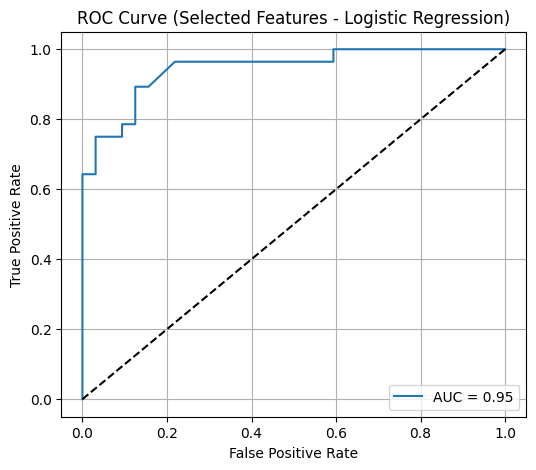


=== Decision Tree (Selected Features) ===
              precision    recall  f1-score   support

           0       0.69      0.78      0.74        32
           1       0.71      0.61      0.65        28

    accuracy                           0.70        60
   macro avg       0.70      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60

Confusion Matrix:
 [[25  7]
 [11 17]]


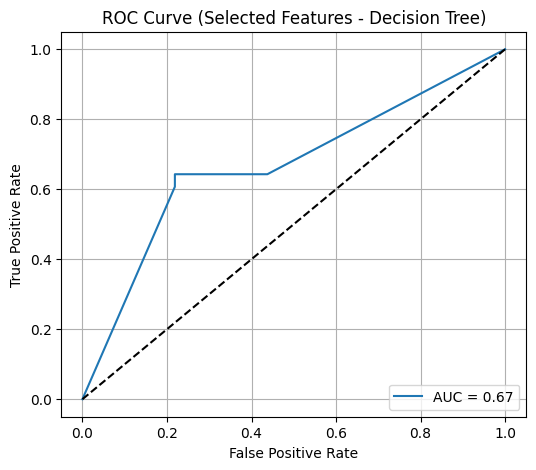


=== Random Forest (Selected Features) ===
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.77      0.71      0.74        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60

Confusion Matrix:
 [[26  6]
 [ 8 20]]


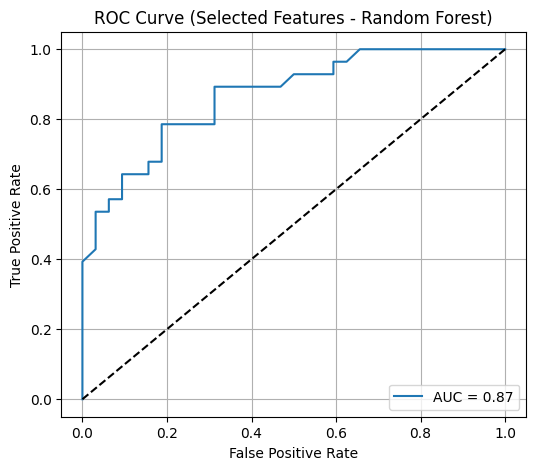


=== SVM (Selected Features) ===
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.95      0.71      0.82        28

    accuracy                           0.85        60
   macro avg       0.87      0.84      0.84        60
weighted avg       0.87      0.85      0.85        60

Confusion Matrix:
 [[31  1]
 [ 8 20]]


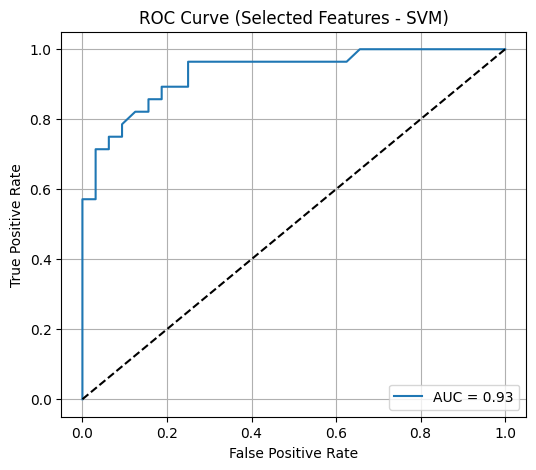


=== Logistic Regression (PCA) ===
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Confusion Matrix:
 [[28  4]
 [ 6 22]]


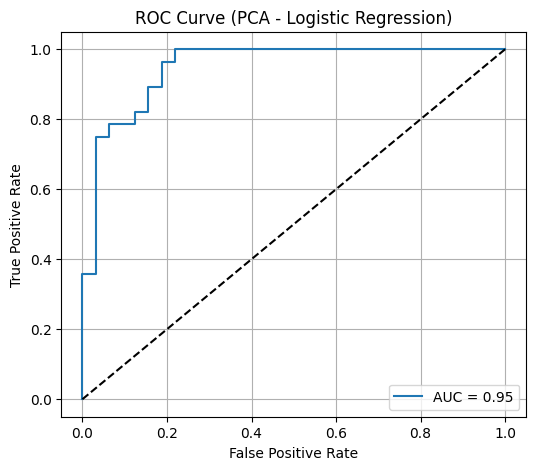


=== Decision Tree (PCA) ===
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

Confusion Matrix:
 [[26  6]
 [ 7 21]]


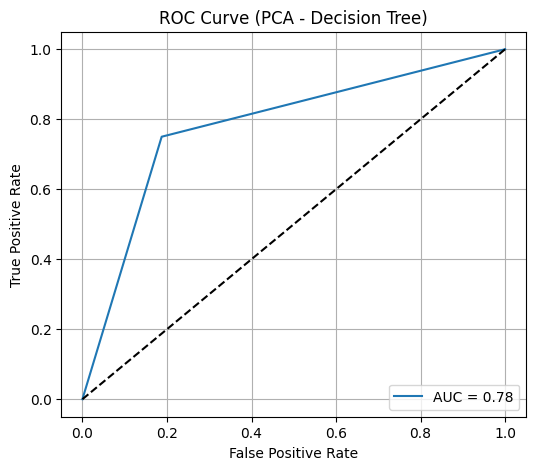


=== Random Forest (PCA) ===
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Confusion Matrix:
 [[29  3]
 [ 6 22]]


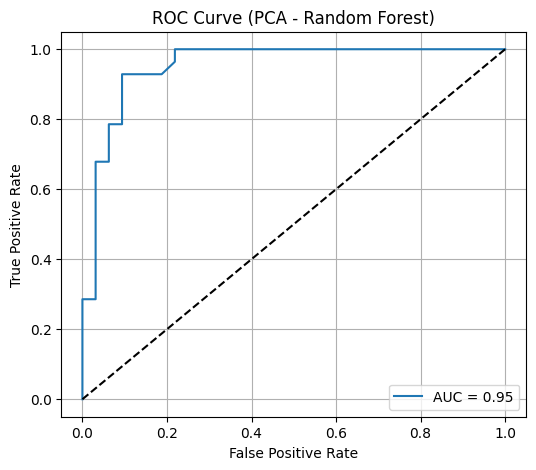


=== SVM (PCA) ===
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60

Confusion Matrix:
 [[29  3]
 [ 9 19]]


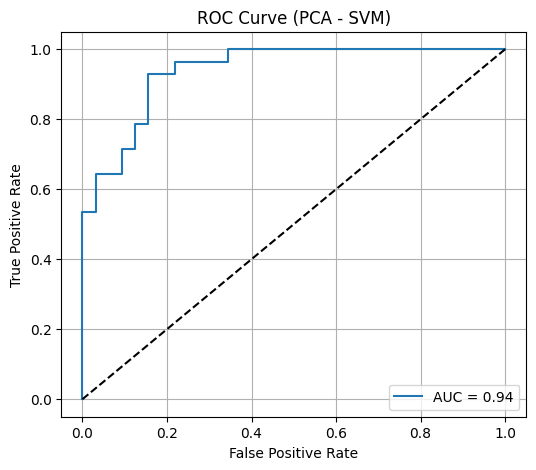


✅ Model Comparison:
             Dataset                Model  Accuracy  Precision    Recall  \
0  Selected Features  Logistic Regression  0.850000   0.913043  0.750000   
1  Selected Features        Decision Tree  0.700000   0.708333  0.607143   
2  Selected Features        Random Forest  0.766667   0.769231  0.714286   
3  Selected Features                  SVM  0.850000   0.952381  0.714286   
4                PCA  Logistic Regression  0.833333   0.846154  0.785714   
5                PCA        Decision Tree  0.783333   0.777778  0.750000   
6                PCA        Random Forest  0.850000   0.880000  0.785714   
7                PCA                  SVM  0.800000   0.863636  0.678571   

         F1       AUC  
0  0.823529  0.945312  
1  0.653846  0.669085  
2  0.740741  0.866629  
3  0.816327  0.933036  
4  0.814815  0.948661  
5  0.763636  0.781250  
6  0.830189  0.952567  
7  0.760000  0.938616  


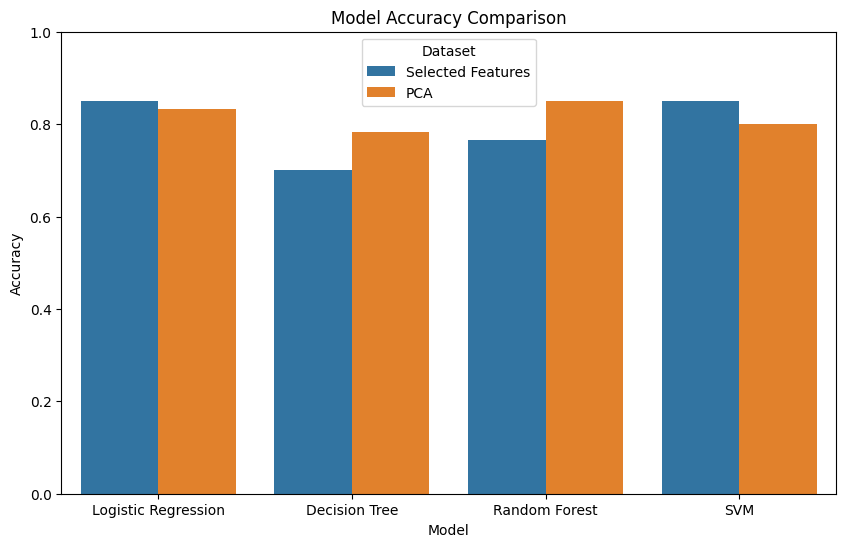

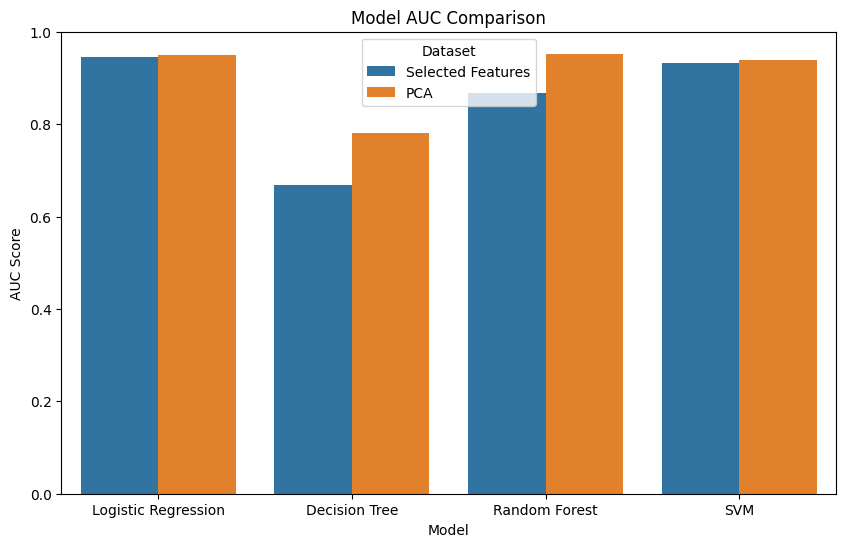

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# -----------------------------
# 1. Load datasets
# -----------------------------
df_features = pd.read_csv("../data/heart_selected_features.csv")
df_pca = pd.read_csv("../data/heart_pca.csv")  # make sure target column exists here

datasets = {
    "Selected Features": df_features,
    "PCA": df_pca
}

# -----------------------------
# 2. Define models
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # probability=True needed for ROC
}

# -----------------------------
# 3. Train models and evaluate
# -----------------------------
results = []

for dataset_name, df in datasets.items():
    # Automatically detect target column
    X = df.drop("target", axis=1)
    y = df["target"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Probabilities for ROC
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)[:, 1]
        else:
            y_probs = model.decision_function(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        results.append([dataset_name, model_name, acc, prec, rec, f1, roc_auc])

        # Print classification report and confusion matrix
        print(f"\n=== {model_name} ({dataset_name}) ===")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

        # Plot ROC Curve
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0,1], [0,1], 'k--')
        plt.title(f'ROC Curve ({dataset_name} - {model_name})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

# -----------------------------
# 4. Results Summary
# -----------------------------
results_df = pd.DataFrame(results, columns=[
    "Dataset", "Model", "Accuracy", "Precision", "Recall", "F1", "AUC"
])
print("\n✅ Model Comparison:")
print(results_df)

# Plot Accuracy Comparison
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot AUC Comparison
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="AUC", hue="Dataset", data=results_df)
plt.title("Model AUC Comparison")
plt.ylabel("AUC Score")
plt.ylim(0, 1)
plt.show()
